# Testing Utilities for LSTM Time Series Forecasting

In [101]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
import tensorflow.keras.models as tkm
import tensorflow.keras.layers as tkl
from Utilities.LSTM_ts_utilities import *

In [91]:
var_name('temp', +1), var_name('temp', 0), var_name('temp', -1)

('temp(t+1)', 'temp(t)', 'temp(t-1)')

### Load data

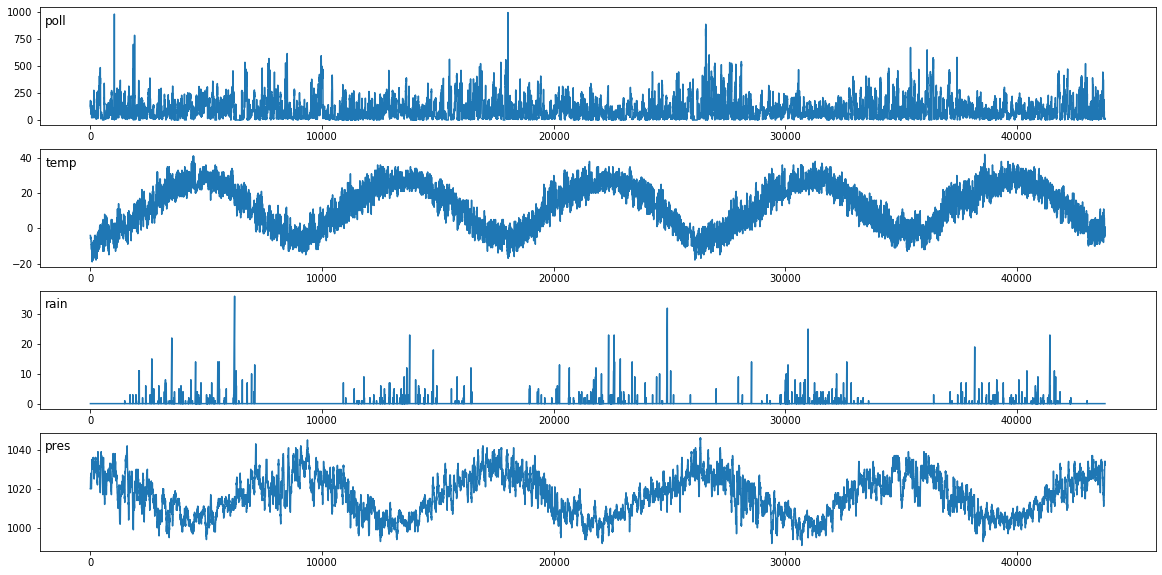

In [92]:
data = pd.read_csv('D:/data/csv/pollution.csv', header=0, index_col=0)
df = data[['pollution', 'temp', 'rain', 'press']]
df.columns = ['poll', 'temp', 'rain', 'pres']
show_tss(df)

### Build dataset for training

Univariate. One step forecast (moving window = 6)

In [93]:
ds = build_ds(df, vobs=['poll'], mw=6, fh=1)
ds.head()

,poll(t-6),poll(t-5),poll(t-4),poll(t-3),poll(t-2),poll(t-1),poll(t)
date,,,,,,,
2010-01-02 06:00:00,129.0,148.0,159.0,181.0,138.0,109.0,105.0
2010-01-02 07:00:00,148.0,159.0,181.0,138.0,109.0,105.0,124.0
2010-01-02 08:00:00,159.0,181.0,138.0,109.0,105.0,124.0,120.0
2010-01-02 09:00:00,181.0,138.0,109.0,105.0,124.0,120.0,132.0
2010-01-02 10:00:00,138.0,109.0,105.0,124.0,120.0,132.0,140.0


Univariate. 3 steps forecast (moving window = 4)

In [94]:
ds = build_ds(df, mw=4, fh=3)
ds.head()

""
date
2010-01-02 00:00:00
2010-01-02 01:00:00
2010-01-02 02:00:00
2010-01-02 03:00:00
2010-01-02 04:00:00


Univariate with externals. One step forecast (moving window = 4)

In [95]:
ds = build_ds(df, vobs=['poll'], vreg=['temp'], mw=4, fh=1)
ds.head()

,poll(t-4),temp(t-4),poll(t-3),temp(t-3),poll(t-2),temp(t-2),poll(t-1),temp(t-1),poll(t)
date,,,,,,,,,
2010-01-02 04:00:00,129.0,-4.0,148.0,-4.0,159.0,-5.0,181.0,-5.0,138.0
2010-01-02 05:00:00,148.0,-4.0,159.0,-5.0,181.0,-5.0,138.0,-5.0,109.0
2010-01-02 06:00:00,159.0,-5.0,181.0,-5.0,138.0,-5.0,109.0,-6.0,105.0
2010-01-02 07:00:00,181.0,-5.0,138.0,-5.0,109.0,-6.0,105.0,-6.0,124.0
2010-01-02 08:00:00,138.0,-5.0,109.0,-6.0,105.0,-6.0,124.0,-5.0,120.0


Univariate with externals. Four steps forecast (moving window=3)

In [96]:
ds = build_ds(df, vobs=['poll'], vreg=['temp'], mw=3, fh=4)
ds.head()

,poll(t-3),temp(t-3),poll(t-2),temp(t-2),poll(t-1),temp(t-1),poll(t),poll(t+1),poll(t+2),poll(t+3)
date,,,,,,,,,,
2010-01-02 03:00:00,129.0,-4.0,148.0,-4.0,159.0,-5.0,181.0,138.0,109.0,105.0
2010-01-02 04:00:00,148.0,-4.0,159.0,-5.0,181.0,-5.0,138.0,109.0,105.0,124.0
2010-01-02 05:00:00,159.0,-5.0,181.0,-5.0,138.0,-5.0,109.0,105.0,124.0,120.0
2010-01-02 06:00:00,181.0,-5.0,138.0,-5.0,109.0,-6.0,105.0,124.0,120.0,132.0
2010-01-02 07:00:00,138.0,-5.0,109.0,-6.0,105.0,-6.0,124.0,120.0,132.0,140.0


Bivariate. One step forecast (moving window = 4)

In [97]:
ds = build_ds(df, vobs=['poll', 'temp'], vreg=[], mw=4, fh=1)
ds.head()

,poll(t-4),temp(t-4),poll(t-3),temp(t-3),poll(t-2),temp(t-2),poll(t-1),temp(t-1),poll(t),temp(t)
date,,,,,,,,,,
2010-01-02 04:00:00,129.0,-4.0,148.0,-4.0,159.0,-5.0,181.0,-5.0,138.0,-5.0
2010-01-02 05:00:00,148.0,-4.0,159.0,-5.0,181.0,-5.0,138.0,-5.0,109.0,-6.0
2010-01-02 06:00:00,159.0,-5.0,181.0,-5.0,138.0,-5.0,109.0,-6.0,105.0,-6.0
2010-01-02 07:00:00,181.0,-5.0,138.0,-5.0,109.0,-6.0,105.0,-6.0,124.0,-5.0
2010-01-02 08:00:00,138.0,-5.0,109.0,-6.0,105.0,-6.0,124.0,-5.0,120.0,-6.0


Bivariate. Two steps forecast with external (moving window=3)

In [103]:
ds = build_ds(df, vobs=['poll', 'temp'], vreg=['rain'], mw=4, fh=2)
ds.head()

,poll(t-4),temp(t-4),rain(t-4),poll(t-3),temp(t-3),rain(t-3),poll(t-2),temp(t-2),rain(t-2),poll(t-1),temp(t-1),rain(t-1),poll(t),temp(t),poll(t+1),temp(t+1)
date,,,,,,,,,,,,,,,,
2010-01-02 04:00:00,129.0,-4.0,0.0,148.0,-4.0,0.0,159.0,-5.0,0.0,181.0,-5.0,0.0,138.0,-5.0,109.0,-6.0
2010-01-02 05:00:00,148.0,-4.0,0.0,159.0,-5.0,0.0,181.0,-5.0,0.0,138.0,-5.0,0.0,109.0,-6.0,105.0,-6.0
2010-01-02 06:00:00,159.0,-5.0,0.0,181.0,-5.0,0.0,138.0,-5.0,0.0,109.0,-6.0,0.0,105.0,-6.0,124.0,-5.0
2010-01-02 07:00:00,181.0,-5.0,0.0,138.0,-5.0,0.0,109.0,-6.0,0.0,105.0,-6.0,0.0,124.0,-5.0,120.0,-6.0
2010-01-02 08:00:00,138.0,-5.0,0.0,109.0,-6.0,0.0,105.0,-6.0,0.0,124.0,-5.0,0.0,120.0,-6.0,132.0,-5.0


### Split train/test  X/y

In [113]:
print(ds.shape, ds.size)
ds.head()

(43795, 16) 700720


,poll(t-4),temp(t-4),rain(t-4),poll(t-3),temp(t-3),rain(t-3),poll(t-2),temp(t-2),rain(t-2),poll(t-1),temp(t-1),rain(t-1),poll(t),temp(t),poll(t+1),temp(t+1)
date,,,,,,,,,,,,,,,,
2010-01-02 04:00:00,129.0,-4.0,0.0,148.0,-4.0,0.0,159.0,-5.0,0.0,181.0,-5.0,0.0,138.0,-5.0,109.0,-6.0
2010-01-02 05:00:00,148.0,-4.0,0.0,159.0,-5.0,0.0,181.0,-5.0,0.0,138.0,-5.0,0.0,109.0,-6.0,105.0,-6.0
2010-01-02 06:00:00,159.0,-5.0,0.0,181.0,-5.0,0.0,138.0,-5.0,0.0,109.0,-6.0,0.0,105.0,-6.0,124.0,-5.0
2010-01-02 07:00:00,181.0,-5.0,0.0,138.0,-5.0,0.0,109.0,-6.0,0.0,105.0,-6.0,0.0,124.0,-5.0,120.0,-6.0
2010-01-02 08:00:00,138.0,-5.0,0.0,109.0,-6.0,0.0,105.0,-6.0,0.0,124.0,-5.0,0.0,120.0,-6.0,132.0,-5.0


In [123]:
X_train, y_train, X_test, y_test  = prep_train(ds, split_index=365*24, steps=2)
print(X_train.shape, X_train.size)
pd.DataFrame(X_train)

(8760, 14) 122640


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,129.0,-4.0,0.0,148.0,-4.0,0.0,159.0,-5.0,0.0,181.0,-5.0,0.0,138.0,-5.0
1,148.0,-4.0,0.0,159.0,-5.0,0.0,181.0,-5.0,0.0,138.0,-5.0,0.0,109.0,-6.0
2,159.0,-5.0,0.0,181.0,-5.0,0.0,138.0,-5.0,0.0,109.0,-6.0,0.0,105.0,-6.0
3,181.0,-5.0,0.0,138.0,-5.0,0.0,109.0,-6.0,0.0,105.0,-6.0,0.0,124.0,-5.0
4,138.0,-5.0,0.0,109.0,-6.0,0.0,105.0,-6.0,0.0,124.0,-5.0,0.0,120.0,-6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,0.0,-5.0,0.0,0.0,-7.0,0.0,0.0,-5.0,0.0,0.0,-9.0,0.0,0.0,-7.0
8756,0.0,-7.0,0.0,0.0,-5.0,0.0,0.0,-9.0,0.0,0.0,-7.0,0.0,36.0,-7.0
8757,0.0,-5.0,0.0,0.0,-9.0,0.0,0.0,-7.0,0.0,36.0,-7.0,0.0,31.0,-7.0
8758,0.0,-9.0,0.0,0.0,-7.0,0.0,36.0,-7.0,0.0,31.0,-7.0,0.0,20.0,-7.0


### Reshape to LSTM tensor

#### Mock data 

In [68]:
train_v1_t3_s3 = pd.DataFrame({'a(t-2)':['a(t-2)[1]','a(t-2)[2]','a(t-2)[3]'], 'a(t-1)': ['a(t-1)[1]','a(t-1)[2]','a(t-1)[3]'],  'a(t)': ['a(t)[1]','a(t)[2]','a(t)[3]'] })
train_v1_t2_s3 = pd.DataFrame({'a(t-1)': ['a(t-1)[1]','a(t-1)[2]','a(t-1)[3]'],  'a(t)': ['a(t)[1]','a(t)[2]','a(t)[3]'] })
train_v2_t3_s3 = pd.DataFrame({'a(t-2)':['a(t-2)[1]','a(t-2)[2]','a(t-2)[3]'], 'b(t-2)': ['b(t-2)[1]','b(t-2)[2]','b(t-2)[3]'],  'a(t-1)': ['a(t-1)[1]','a(t-1)[2]','a(t-1)[3]'],  'b(t-1)': ['b(t-1)[1]','b(t-1)[2]','b(t-1)[3]'],  'a(t)': ['a(t)[1]','a(t)[2]','a(t)[3]'], 'b(t)': ['b(t)[1]','b(t)[2]','b(t)[3]']})
train_v3_t3_s3 = pd.DataFrame({'a(t-2)':['a(t-2)[1]','a(t-2)[2]','a(t-2)[3]'], 'b(t-2)': ['b(t-2)[1]','b(t-2)[2]','b(t-2)[3]'], 'c(t-2)': ['c(t-2)[1]','c(t-2)[2]','c(t-2)[3]'],  'a(t-1)': ['a(t-1)[1]','a(t-1)[2]','a(t-1)[3]'],  'b(t-1)': ['b(t-1)[1]','b(t-1)[2]','b(t-1)[3]'], 'c(t-1)': ['c(t-1)[1]','c(t-1)[2]','c(t-1)[3]'], 'a(t)': ['a(t)[1]','a(t)[2]','a(t)[3]'], 'b(t)': ['b(t)[1]','b(t)[2]','b(t)[3]'], 'c(t)': ['c(t)[1]','c(t)[2]','c(t)[3]']})

In [69]:
nvars = 3
nsteps = 3
nsamples = 3
train_2d = train_v3_t3_s3
print(train_2d.shape, train_2d.size)
train_2d

(3, 9) 27


,a(t-2),b(t-2),c(t-2),a(t-1),b(t-1),c(t-1),a(t),b(t),c(t)
0,a(t-2)[1],b(t-2)[1],c(t-2)[1],a(t-1)[1],b(t-1)[1],c(t-1)[1],a(t)[1],b(t)[1],c(t)[1]
1,a(t-2)[2],b(t-2)[2],c(t-2)[2],a(t-1)[2],b(t-1)[2],c(t-1)[2],a(t)[2],b(t)[2],c(t)[2]
2,a(t-2)[3],b(t-2)[3],c(t-2)[3],a(t-1)[3],b(t-1)[3],c(t-1)[3],a(t)[3],b(t)[3],c(t)[3]


In [70]:
train_3d = train_2d.values.reshape((nsamples, nsteps, nvars))
print('3d : ' , train_3d.shape, train_3d.size, '\n')

print('Var\tStep\tSample\tValue')
vars = ['a','b','c']
steps = [['t'], ['t-1', 't'], ['t-2', 't-1', 't']]
for s in range(nsamples):
    for t in range(nsteps):
        for v in range(nvars):
            print(vars[v], '\t', steps[nsteps-1][t], '\t', (s+1), '\t', train_3d[s,t,v])

3d :  (3, 3, 3) 27 

Var	Step	Sample	Value
a 	 t-2 	 1 	 a(t-2)[1]
b 	 t-2 	 1 	 b(t-2)[1]
c 	 t-2 	 1 	 c(t-2)[1]
a 	 t-1 	 1 	 a(t-1)[1]
b 	 t-1 	 1 	 b(t-1)[1]
c 	 t-1 	 1 	 c(t-1)[1]
a 	 t 	 1 	 a(t)[1]
b 	 t 	 1 	 b(t)[1]
c 	 t 	 1 	 c(t)[1]
a 	 t-2 	 2 	 a(t-2)[2]
b 	 t-2 	 2 	 b(t-2)[2]
c 	 t-2 	 2 	 c(t-2)[2]
a 	 t-1 	 2 	 a(t-1)[2]
b 	 t-1 	 2 	 b(t-1)[2]
c 	 t-1 	 2 	 c(t-1)[2]
a 	 t 	 2 	 a(t)[2]
b 	 t 	 2 	 b(t)[2]
c 	 t 	 2 	 c(t)[2]
a 	 t-2 	 3 	 a(t-2)[3]
b 	 t-2 	 3 	 b(t-2)[3]
c 	 t-2 	 3 	 c(t-2)[3]
a 	 t-1 	 3 	 a(t-1)[3]
b 	 t-1 	 3 	 b(t-1)[3]
c 	 t-1 	 3 	 c(t-1)[3]
a 	 t 	 3 	 a(t)[3]
b 	 t 	 3 	 b(t)[3]
c 	 t 	 3 	 c(t)[3]


### Real data

In [125]:
mw=3
ds = build_ds(df, vobs=['poll', 'temp', 'rain'], vreg=[], mw=mw, fh=2)
print(ds.shape, ds.size)
ds.head()

(43796, 15) 656940


,poll(t-3),temp(t-3),rain(t-3),poll(t-2),temp(t-2),rain(t-2),poll(t-1),temp(t-1),rain(t-1),poll(t),temp(t),rain(t),poll(t+1),temp(t+1),rain(t+1)
date,,,,,,,,,,,,,,,
2010-01-02 03:00:00,129.0,-4.0,0.0,148.0,-4.0,0.0,159.0,-5.0,0.0,181.0,-5.0,0,138.0,-5.0,0.0
2010-01-02 04:00:00,148.0,-4.0,0.0,159.0,-5.0,0.0,181.0,-5.0,0.0,138.0,-5.0,0,109.0,-6.0,0.0
2010-01-02 05:00:00,159.0,-5.0,0.0,181.0,-5.0,0.0,138.0,-5.0,0.0,109.0,-6.0,0,105.0,-6.0,0.0
2010-01-02 06:00:00,181.0,-5.0,0.0,138.0,-5.0,0.0,109.0,-6.0,0.0,105.0,-6.0,0,124.0,-5.0,0.0
2010-01-02 07:00:00,138.0,-5.0,0.0,109.0,-6.0,0.0,105.0,-6.0,0.0,124.0,-5.0,0,120.0,-6.0,0.0


In [72]:
nsteps = 3
nvars = 3
ncols = nsteps * nvars
split_index = 365*24

In [130]:
X_train, y_train, X_test, y_test  = prep_train(ds, split_index=365*24, steps=6)
print(X_train.shape, X_train.size)
pd.DataFrame(X_train)

(8760, 9) 78840


,0,1,2,3,4,5,6,7,8
0,129.0,-4.0,0.0,148.0,-4.0,0.0,159.0,-5.0,0.0
1,148.0,-4.0,0.0,159.0,-5.0,0.0,181.0,-5.0,0.0
2,159.0,-5.0,0.0,181.0,-5.0,0.0,138.0,-5.0,0.0
3,181.0,-5.0,0.0,138.0,-5.0,0.0,109.0,-6.0,0.0
4,138.0,-5.0,0.0,109.0,-6.0,0.0,105.0,-6.0,0.0
...,...,...,...,...,...,...,...,...,...
8755,0.0,-5.0,0.0,0.0,-7.0,0.0,0.0,-5.0,0.0
8756,0.0,-7.0,0.0,0.0,-5.0,0.0,0.0,-9.0,0.0
8757,0.0,-5.0,0.0,0.0,-9.0,0.0,0.0,-7.0,0.0
8758,0.0,-9.0,0.0,0.0,-7.0,0.0,36.0,-7.0,0.0


In [131]:
# reshape input to be 3D [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], nsteps, nvars))
X_test = X_test.reshape((X_test.shape[0], nsteps, nvars))
X_train.shape, X_test.shape

((8760, 3, 3), (35036, 3, 3))

## Credits & Links

https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/